In [3]:
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import pandas as pd

In [4]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,HARARE (Reuters) - Zimbabwe s army appears to ...,1
1,"Pray for these police officers, the innocent c...",0
2,WASHINGTON (Reuters) - The U.S. Labor Departme...,1
3,WASHINGTON (Reuters) - U.S. President Donald T...,1
4,WASHINGTON (Reuters) - The U.S. Congress on Th...,1
...,...,...
44893,WASHINGTON/NEW YORK (Reuters) - Jerome Powell ...,1
44894,WASHINGTON (Reuters) - Republican presidential...,1
44895,HONOLULU/NEW YORK (Reuters) - Just hours befor...,1
44896,"Apparently, the arrogant 88-year-old Congressm...",0


In [6]:
patterns = {
            r'\d+': '',             
            r'[^\w\s]': ' ',         
            r'\b\w{1,2}\b':'',      
            r'(http|www)[^\s]+':'', 
            r'\s+': ' '             
            }

In [7]:
def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() 
    return df


clean_column(df, 'text', patterns)

C:\Users\ifoa\AppData\Local\Temp\ipykernel_420\1785185664.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(pattern, replacement)


,text,class
0,harare reuters zimbabwe army appears pushing f...,1
1,pray for these police officers the innocent ci...,0
2,washington reuters the labor department has ta...,1
3,washington reuters president donald trump tues...,1
4,washington reuters the congress thursday avert...,1
...,...,...
44893,washington new york reuters jerome powell was ...,1
44894,washington reuters republican presidential can...,1
44895,honolulu new york reuters just hours before pr...,1
44896,apparently the arrogant year old congressman j...,0


In [8]:
df = clean_column(df, 'text', patterns)
df

C:\Users\ifoa\AppData\Local\Temp\ipykernel_420\1785185664.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(pattern, replacement)


,text,class
0,harare reuters zimbabwe army appears pushing f...,1
1,pray for these police officers the innocent ci...,0
2,washington reuters the labor department has ta...,1
3,washington reuters president donald trump tues...,1
4,washington reuters the congress thursday avert...,1
...,...,...
44893,washington new york reuters jerome powell was ...,1
44894,washington reuters republican presidential can...,1
44895,honolulu new york reuters just hours before pr...,1
44896,apparently the arrogant year old congressman j...,0


In [9]:
df['text'][0]

'harare reuters zimbabwe army appears pushing for quick and bloodless end year old president robert mugabe years power replaced national unity government headed his former deputy emmerson mnangagwa according political sources harare mugabe now under house arrest his lavish harare home was resisting pressure stand down voluntarily nlnnmn assuming does the following are likely key players the expected settlement according political sources zimbabwe and south africa and several years zimbabwean intelligence documents seen reuters emmerson mnangagwa likely president lifelong mugabe aide and liberation war veteran known the crocodile mnangagwa was the pole position succeed mugabe until his progress was impeded the dramatic political ascent mugabe wife grace his sacking vice president this month cleared path for grace the presidency and appears have been the trigger for the army step advance its preferred successor morgan tsvangirai likely prime minister former union leader who founded the m

In [10]:
text = list(map(str, df['text']))
text = ''.join(text)

(-0.5, 799.5, 399.5, -0.5)

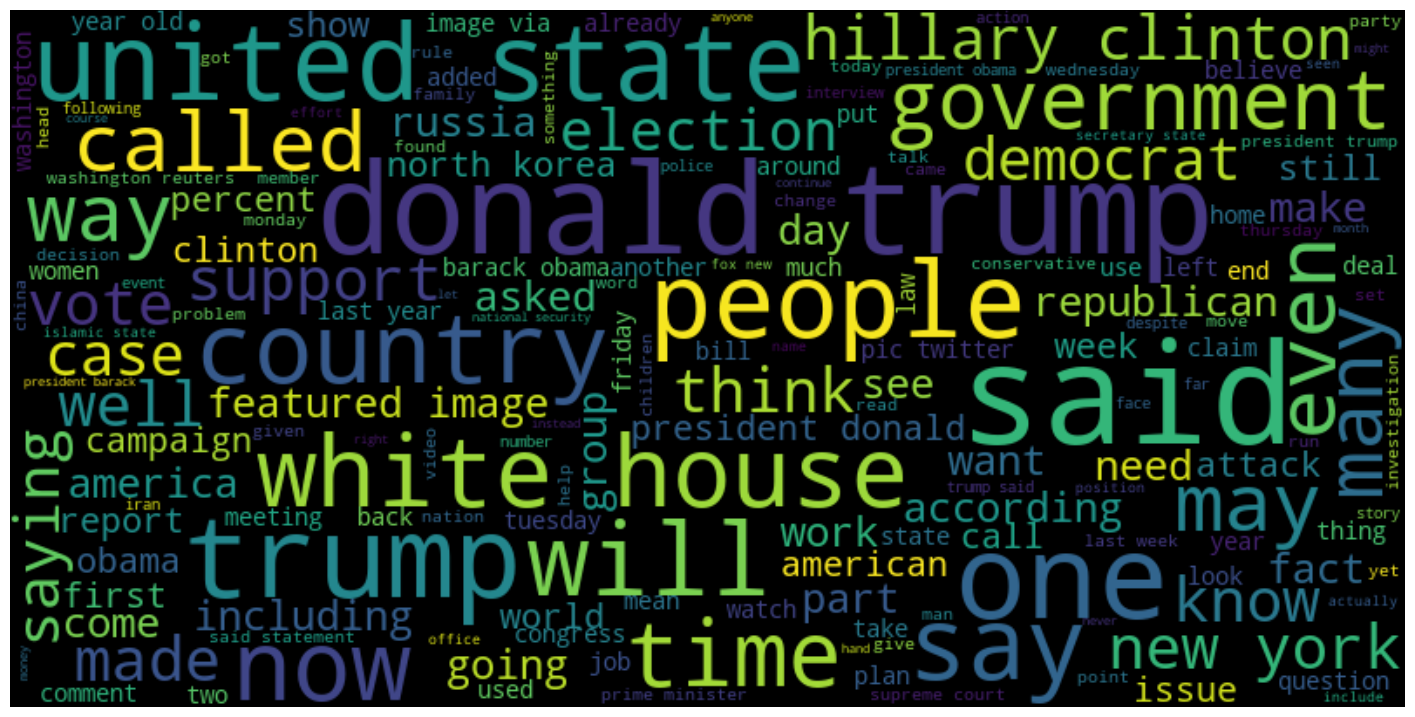

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [12]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
X = df['text']
y = df['class']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


In [15]:

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
X_vect = vectorizer.fit_transform(X).toarray()
X_vect


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [3, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [16]:
X_vect.shape

(44898, 1500)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04817955, 0.        ,
        0.        ],
       [0.        , 0.05554677, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03394821, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02850589,
        0.        ],
       [0.21819585, 0.        , 0.        , ..., 0.05820455, 0.        ,
        0.        ]])

In [19]:
X_tfidf.shape

(44898, 1500)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [22]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

In [23]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9695619896065331

In [24]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

MultinomialNB(alpha=0.1)

In [25]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9272457312546399

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7024
           1       0.92      0.93      0.92      6446

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 


Text(95.72222222222221, 0.5, 'Actual')

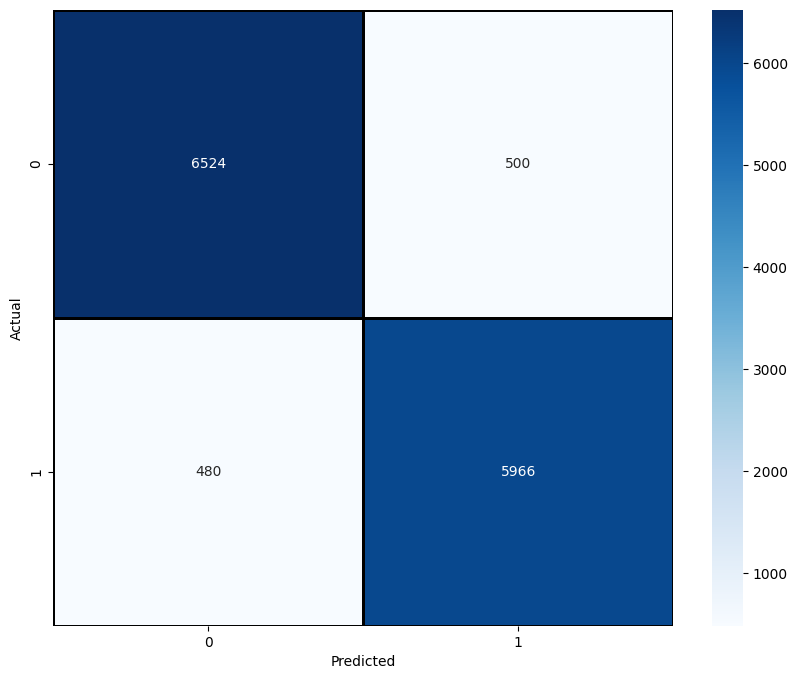

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [29]:
from sklearn.linear_model import SGDClassifier


In [30]:
classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9541202672605791

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

In [34]:
pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9738678544914625


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7024
           1       0.97      0.98      0.97      6446

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

Text(95.72222222222221, 0.5, 'Actual')

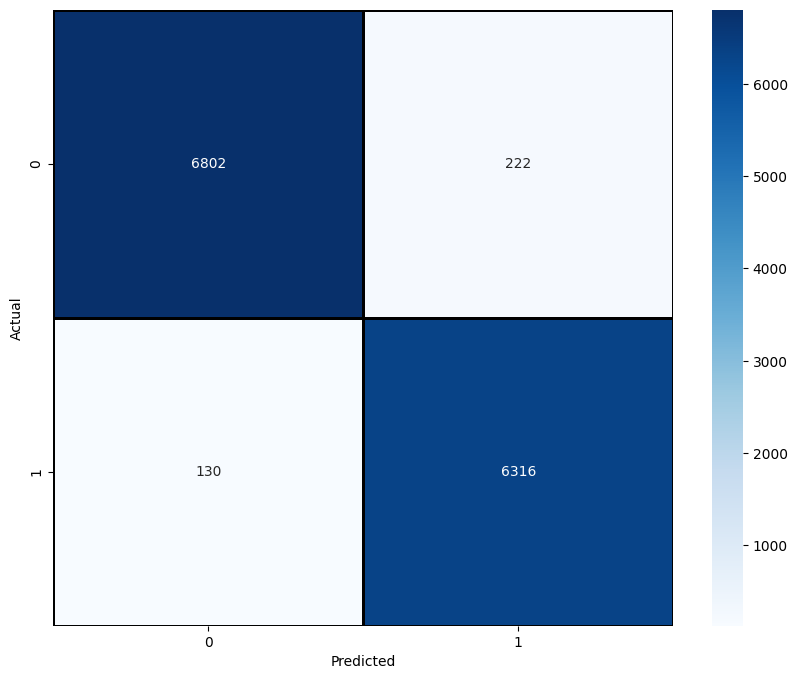

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [38]:
import numpy as np

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.9771958  0.97113843 0.97327156 0.9743407  0.97558803 0.97701354
 0.97416251 0.9743407 ]
mean=0.9746314073809665
std=0.0018575771844510096


In [40]:
import joblib
joblib.dump(pipe,'news.pkl')

['news.pkl']

In [46]:
import joblib

uploaded_model = joblib.load('news.pkl')
pred = uploaded_model.predict(['house']) 
pred[0]

1

In [52]:
import joblib

uploaded_model = joblib.load('news.pkl')
pred = uploaded_model.predict(['monday']) 
pred[0]

1

In [51]:
import joblib

uploaded_model = joblib.load('news.pkl')
pred = uploaded_model.predict(['trump']) 
pred[0]

0